# Assignment 3 - Bank Marketing Dataset 
### Naila Qisthi Azzahra
### PYTN-KS08-018

### Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
#### Source Data
Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
### Input Variables :
##### bank client data
- age 
- job : Type of job
- marital : Marital status
- education 
- default : has credit in default? yes or no
- housing : has housing loan? yes or no
- loan : has personal loan? yes or no

##### related with the last contact of the current campaign
- contact : contact communication type
- month : last contact month of year
- day_of_week : last contact day of the week
- duration : last contact duration in second

##### other attributes
- campaign : number of contacts performed during this campaign and for this client
- pdays : number of days that passed by after the client was last contacted from a previous campaign
- previous : number of contacts performed before this campaign and for this client
- poutcome : outcome of the previous marketing campaign

##### social and economic context attributes
- emp.var.rate : employment variation rate - quarterly indicator
- cons.price.idx : consumer price index - minthly indicator
- cons.conf.idx : consumer confidence index - monthly indicator
- euribor3m : euribor 3 month rate - daily indicator
- nr.employed : number of employees - quarterly indicator

##### output variable (desired target)
- y : has the client subscribed a term deposit? yes or no

### Objective
This classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

### Import Library
Step pertama adalah melakukan import library yang akan digunakan pada project ini

In [1]:
#for data prepocessing
import pandas as pd
import numpy as np 

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for encoding categorical data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#for splitting data into train and test
from sklearn.model_selection import train_test_split

#for building model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#for evaluating model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Data Loading

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [7]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [8]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [9]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [10]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [11]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [12]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [13]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

### Data Cleaning

In [14]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
#delete all unknown data
df = df[df!='unknown']

In [16]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [18]:
df = df.dropna()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
df.duplicated().sum()

10

In [21]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Data Visualisasi

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


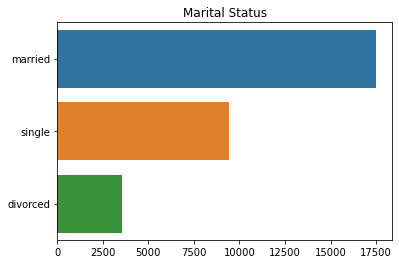

In [22]:
sns.barplot(df['marital'].value_counts().values, df['marital'].value_counts().index, data=df)
plt.title('Marital Status')
plt.show()

Nasabah dengan status Married lebih banyak dibandingkan dengan single, serta nasabah dengan status divorced jumlahnya paling sedikit.

Text(0.5, 1.0, 'Histogram of Age')

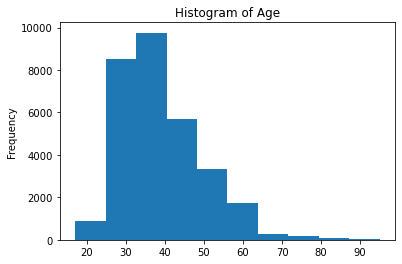

In [23]:
df['age'].plot(kind='hist')
plt.title('Histogram of Age')

Berdasarkan data, dapat dilihat pada histogram dari age yang bentuknya menceng kiri, data berkumpul pada nilai yang kecil. Ini berarti bahwa frekuensi nasabah dengan usia rentang 30 - 40 lebih banyak.

Text(0.5, 1.0, 'Persentage of Loan Status')

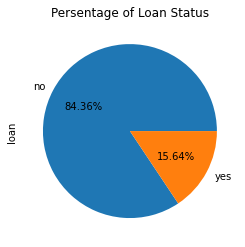

In [24]:
df['loan'].value_counts().plot(kind='pie',
                    autopct ='%1.2f%%',)
plt.title('Persentage of Loan Status')

Sebanyak 84.36% nasabah tidak memiliki personal loan, dan sisanya 15.64% memiliki personal loan

### Data Preprocessing

In [25]:
#encoding data tipe kategori
data = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in data:
    df[col] = label_encoder.fit_transform(df[col])
df.head(5)

<ipython-input-25-822582d7f766>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
#split data for train and test data
y = df.iloc[:,-1]
X = df.iloc[:,0:20]

In [27]:
#20% data test dan 80% data train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

### Modelling

#### 1. Logistic Regression

In [28]:
#bulding and fitting Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
print('Test data accuracy', logreg.score(X_test, y_test))

Test data accuracy 0.9014430960970811


In [30]:
#check for confusion matrix Logistic Regression Model
pred_test1 = logreg.predict(X_test)
print(accuracy_score(y_test, pred_test1))
matrix1 = confusion_matrix(y_test, pred_test1)
print(matrix1)

0.9014430960970811
[[5187  149]
 [ 452  310]]


<function matplotlib.pyplot.show(close=None, block=None)>

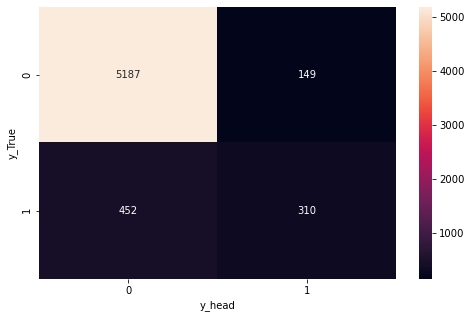

In [31]:
#visualize the confusion matrix Logistic Regression Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix1, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [32]:
#Metrics Performance for Logistic Regression Model
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5336
           1       0.68      0.41      0.51       762

    accuracy                           0.90      6098
   macro avg       0.80      0.69      0.73      6098
weighted avg       0.89      0.90      0.89      6098



#### 2. K-Nearest Neighbors

In [33]:
#bulding and fitting KNN Model
KNN = KNeighborsClassifier(n_neighbors=50)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [34]:
print('Test data accuracy', KNN.score(X_test, y_test))

Test data accuracy 0.9068547064611348


In [35]:
#check for confusion matrix KNN Model
pred_test2 = KNN.predict(X_test)
print(accuracy_score(y_test, pred_test2))
matrix2 = confusion_matrix(y_test, pred_test2)
print(matrix2)

0.9068547064611348
[[5142  194]
 [ 374  388]]


<function matplotlib.pyplot.show(close=None, block=None)>

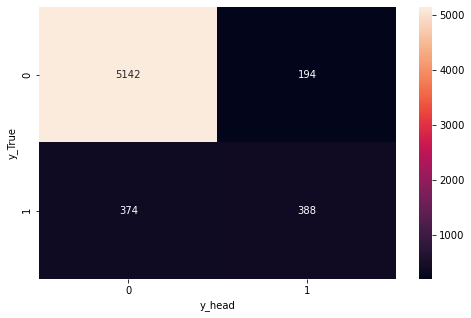

In [36]:
#visualize the confusion matrix KNN Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix2, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [37]:
#Metrics Performance for KNN Model
print(classification_report(y_test, pred_test2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5336
           1       0.67      0.51      0.58       762

    accuracy                           0.91      6098
   macro avg       0.80      0.74      0.76      6098
weighted avg       0.90      0.91      0.90      6098



#### 3. Support Vector Machine

In [38]:
#building SVM model
svm_model = SVC()

In [39]:
#fitting SVM model
svm_model.fit(X_train, y_train)

SVC()

In [40]:
#check for accuracy SVM model with test data
print('Test data accuracy', svm_model.score(X_test, y_test))

Test data accuracy 0.8876680878976714


In [41]:
#check for confusion matrix SVM Model
pred_test3 = svm_model.predict(X_test)
print(accuracy_score(y_test, pred_test3))
matrix3 = confusion_matrix(y_test, pred_test3)
print(matrix3)

0.8876680878976714
[[5235  101]
 [ 584  178]]


<function matplotlib.pyplot.show(close=None, block=None)>

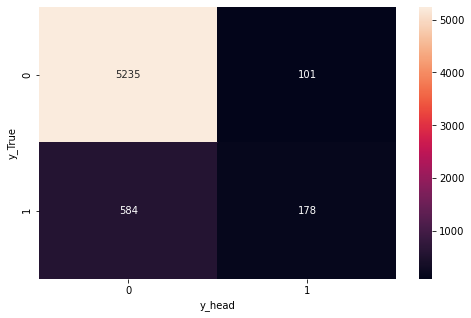

In [42]:
#visualize the confusion matrix SVM Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix3, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [43]:
#Metrics Performance for SVM Model
print(classification_report(y_test, pred_test3))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5336
           1       0.64      0.23      0.34       762

    accuracy                           0.89      6098
   macro avg       0.77      0.61      0.64      6098
weighted avg       0.87      0.89      0.86      6098



#### 4. Decision Tree

In [44]:
#building and fitting Decision Tree Model
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
#check for accuracy Decision Tree model with test data
print('Test data accuracy', decisiontree.score(X_test, y_test))

Test data accuracy 0.9094785175467366


In [46]:
#check for confusion matrix Decision Tree Model
pred_test4 = decisiontree.predict(X_test)
print(accuracy_score(y_test, pred_test4))
matrix4 = confusion_matrix(y_test, pred_test4)
print(matrix4)

0.9094785175467366
[[5066  270]
 [ 282  480]]


<function matplotlib.pyplot.show(close=None, block=None)>

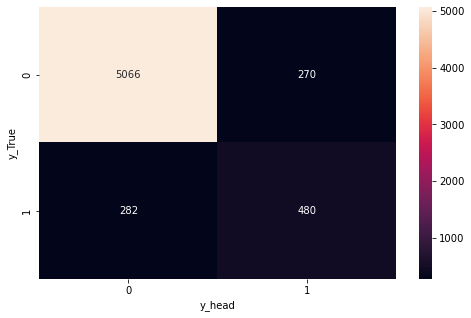

In [47]:
#visualize the confusion matrix Decision Tree Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix4, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [48]:
#Metrics Performance for Decision Tree Model
print(classification_report(y_test, pred_test4))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5336
           1       0.64      0.63      0.63       762

    accuracy                           0.91      6098
   macro avg       0.79      0.79      0.79      6098
weighted avg       0.91      0.91      0.91      6098



#### 5. Random Forest

In [49]:
#building and fitting Random Forest Model
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
#check for accuracy Random Forest model with test data
print('Test data accuracy', randomforest.score(X_test, y_test))

Test data accuracy 0.905706789111184


In [51]:
#check for confusion matrix Random Forest Model
pred_test5 = randomforest.predict(X_test)
print(accuracy_score(y_test, pred_test5))
matrix5 = confusion_matrix(y_test, pred_test5)
print(matrix5)

0.905706789111184
[[5132  204]
 [ 371  391]]


<function matplotlib.pyplot.show(close=None, block=None)>

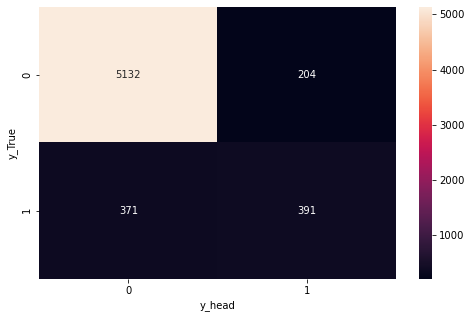

In [52]:
#visualize the confusion matrix Random Forest Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix5, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [53]:
#Metrics Performance for Random Forest Model
print(classification_report(y_test, pred_test5))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5336
           1       0.66      0.51      0.58       762

    accuracy                           0.91      6098
   macro avg       0.79      0.74      0.76      6098
weighted avg       0.90      0.91      0.90      6098



#### 6. Naive Bayes

In [54]:
#building and fitting Naive Bayes Model
naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)

GaussianNB()

In [55]:
#check for accuracy Naive Bayes model with test data
print('Test data accuracy', naivebayes.score(X_test, y_test))

Test data accuracy 0.8360118071498852


In [56]:
#check for confusion matrix Naive Bayes Model
pred_test6 = naivebayes.predict(X_test)
print(accuracy_score(y_test, pred_test6))
matrix6 = confusion_matrix(y_test, pred_test6)
print(matrix6)

0.8360118071498852
[[4632  704]
 [ 296  466]]


<function matplotlib.pyplot.show(close=None, block=None)>

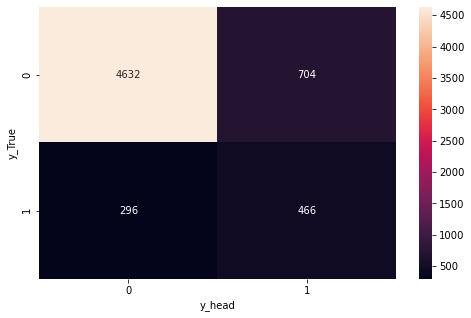

In [57]:
#visualize the confusion matrix Naive Bayes Model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix6, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [58]:
#Metrics Performance for Random Forest Model
print(classification_report(y_test, pred_test6))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      5336
           1       0.40      0.61      0.48       762

    accuracy                           0.84      6098
   macro avg       0.67      0.74      0.69      6098
weighted avg       0.87      0.84      0.85      6098



### Kesimpulan Model

In [59]:
print("Akurasi masing-masing model:")
print("Logistic Regression:",accuracy_score(y_test, pred_test1))
print("K-Nearest Neighbors:",accuracy_score(y_test, pred_test2))
print("Support Vector Machine:",accuracy_score(y_test, pred_test3))
print("Decision Tree:",accuracy_score(y_test, pred_test4))
print("Random Forest:",accuracy_score(y_test, pred_test5))
print("Naive Bayes:",accuracy_score(y_test, pred_test6))

Akurasi masing-masing model:
Logistic Regression: 0.9014430960970811
K-Nearest Neighbors: 0.9068547064611348
Support Vector Machine: 0.8876680878976714
Decision Tree: 0.9094785175467366
Random Forest: 0.905706789111184
Naive Bayes: 0.8360118071498852


Berdasarkan fitting model serta training model classifcation yang telah dilakukan, didapat hasil bahwa tingkat akurasi tertinggi ada pada model Decision Tree yaitu 90.91%. Model Decision Tree ini kedepannya dapat digunakan untuk memprediksi apakah klien akan mengambil deposit atau tidak.